##  Business Understanding 
The Consumer Behavior and Shopping Habits Dataset is a valuable resource for understanding consumer preferences and purchasing behaviors. In this assignment, you will perform data wrangling tasks to clean and prepare the dataset for analysis. The primary focus will be on handling missing values and gaining insights into consumer behavior.


## Objective 
1. Data Loading and Exploration
2. Handling Missing Values
3. Data Transformation
4. Categorical Data Encoding
5. Exploratory Data Analysis
6. Conclusion and Insights



### Importing all relevant libraries and csv file 

In [2]:
# numpy and pandas libraries
import pandas as pd
import numpy as np

# Visualization Libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding Libraries
from sklearn.preprocessing import LabelEncoder

# Import Warning 
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# importing csv file 

df = pd.read_csv("shopping_behavior_4_IA.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,,Male,Blouse,Clothing,53,Kentucky,L,,Winter,,Yes,Express,Yes,Yes,1,,Fortnightly
1,2,19,Male,Sweater,Clothing,,,L,Maroon,Winter,,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,,Clothing,73,Massachusetts,S,Maroon,Spring,,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,9,PayPal,Weekly
4,5,,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,


In [3]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

We noticed from our Dataset We can see blank rows or NAN values but python does not recognize them as NAN.. so we have to work on them!!!!

#### Replacing all the blanks with NaN using the replace method 

In [4]:

# the Replace function replaces all blank rows with nan
# the ^\s*$ matches a line that consists of only whitespace (including an empty string).

df.replace('^\s*$', np.nan, regex=True, inplace=True)



#### Display the first 10 rows of the dataset to get an overview of its structure.

In [5]:
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,NaN,Male,Blouse,Clothing,53,Kentucky,L,NaN,Winter,NaN,Yes,Express,Yes,Yes,1,NaN,Fortnightly
1,2,19,Male,Sweater,Clothing,NaN,NaN,L,Maroon,Winter,NaN,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,NaN,Clothing,73,Massachusetts,S,Maroon,Spring,NaN,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,NaN,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,9,PayPal,Weekly
4,5,NaN,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,NaN
5,6,46,Male,Sneakers,Footwear,NaN,Wyoming,M,NaN,Summer,2.9,Yes,Standard,Yes,Yes,1,NaN,Weekly
6,7,63,Male,Shirt,Clothing,NaN,Montana,M,NaN,Fall,3.2,Yes,Free Shipping,Yes,Yes,9,Cash,Quarterly
7,8,NaN,Male,Shorts,Clothing,NaN,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,NaN,Male,Coat,NaN,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,NaN,NaN
9,10,57,Male,Handbag,Accessories,NaN,Missouri,M,Pink,Spring,4.8,Yes,NaN,Yes,Yes,NaN,Cash,Quarterly


In [6]:
df.isna().sum()

Customer ID                 0
Age                       661
Gender                      0
Item Purchased            124
Category                  324
Purchase Amount (USD)     414
Location                  166
Size                        0
Color                     301
Season                      0
Review Rating             309
Subscription Status         0
Shipping Type             627
Discount Applied            0
Promo Code Used             0
Previous Purchases        163
Payment Method            634
Frequency of Purchases    572
dtype: int64

## Data Understanding 

In [7]:
# number of rows and columns
df.shape

(3900, 18)

In [8]:
# information about the columns and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer ID             3900 non-null   int64 
 1   Age                     3239 non-null   object
 2   Gender                  3900 non-null   object
 3   Item Purchased          3776 non-null   object
 4   Category                3576 non-null   object
 5   Purchase Amount (USD)   3486 non-null   object
 6   Location                3734 non-null   object
 7   Size                    3900 non-null   object
 8   Color                   3599 non-null   object
 9   Season                  3900 non-null   object
 10  Review Rating           3591 non-null   object
 11  Subscription Status     3900 non-null   object
 12  Shipping Type           3273 non-null   object
 13  Discount Applied        3900 non-null   object
 14  Promo Code Used         3900 non-null   object
 15  Prev

> The number of rows is exactly 18 as it should be 

> From data columns we can tell there are missing values becuase the total rows for each column should be 3900 but some    columns are less 

> when we look at Dtype which talks about the data type for each columns they are some key issues we need to look at. The follwong columns should be a float not an object ('Purchase Amount (USD)', 'Review Rating ','Previous Purchases')and age intger. We need to check those columns and change the data type 

In [9]:
df.head(10)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,NaN,Male,Blouse,Clothing,53,Kentucky,L,NaN,Winter,NaN,Yes,Express,Yes,Yes,1,NaN,Fortnightly
1,2,19,Male,Sweater,Clothing,NaN,NaN,L,Maroon,Winter,NaN,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,NaN,Clothing,73,Massachusetts,S,Maroon,Spring,NaN,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,NaN,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,9,PayPal,Weekly
4,5,NaN,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,NaN
5,6,46,Male,Sneakers,Footwear,NaN,Wyoming,M,NaN,Summer,2.9,Yes,Standard,Yes,Yes,1,NaN,Weekly
6,7,63,Male,Shirt,Clothing,NaN,Montana,M,NaN,Fall,3.2,Yes,Free Shipping,Yes,Yes,9,Cash,Quarterly
7,8,NaN,Male,Shorts,Clothing,NaN,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,NaN,Male,Coat,NaN,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,NaN,NaN
9,10,57,Male,Handbag,Accessories,NaN,Missouri,M,Pink,Spring,4.8,Yes,NaN,Yes,Yes,NaN,Cash,Quarterly


### Cleaning our Data 
#### Visualizing all NAN columns

In [10]:
# Finding the mean percent of the NAN values 
nan_percentage = df.isna().mean() * 100
nan_percentage 


Customer ID                0.000000
Age                       16.948718
Gender                     0.000000
Item Purchased             3.179487
Category                   8.307692
Purchase Amount (USD)     10.615385
Location                   4.256410
Size                       0.000000
Color                      7.717949
Season                     0.000000
Review Rating              7.923077
Subscription Status        0.000000
Shipping Type             16.076923
Discount Applied           0.000000
Promo Code Used            0.000000
Previous Purchases         4.179487
Payment Method            16.256410
Frequency of Purchases    14.666667
dtype: float64

In [11]:
# finding all unique values from check columns 
df.nunique()

Customer ID               3900
Age                         44
Gender                       2
Item Purchased              24
Category                     3
Purchase Amount (USD)       73
Location                    48
Size                         4
Color                       23
Season                       4
Review Rating               24
Subscription Status          2
Shipping Type                5
Discount Applied             2
Promo Code Used              2
Previous Purchases          37
Payment Method               5
Frequency of Purchases       6
dtype: int64

#### Visualizing percentage of NAN values 

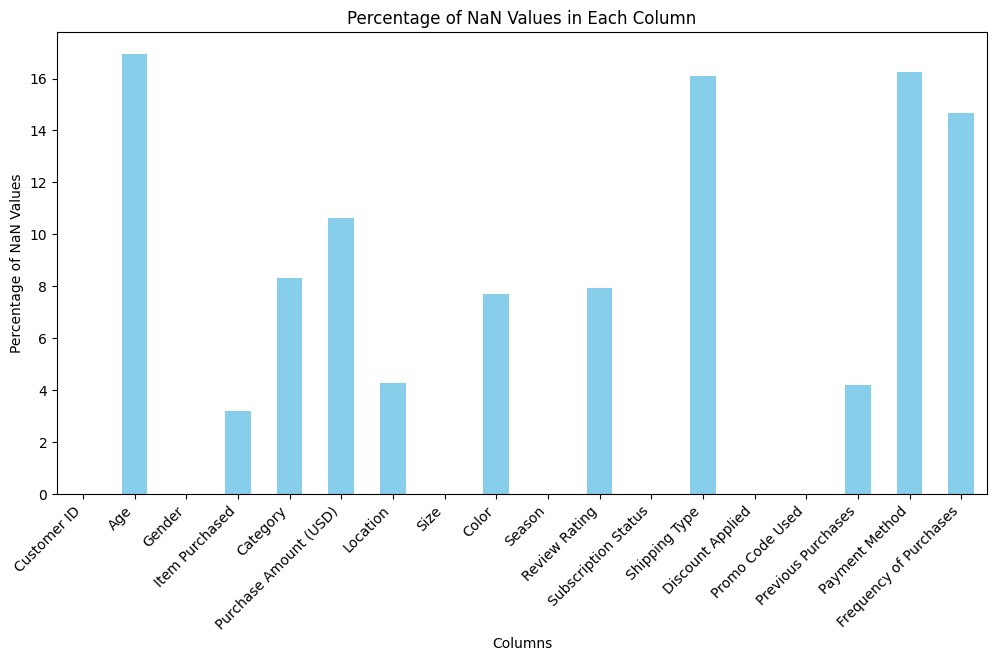

In [12]:
# visualizing NaN percentages
nan_percentage = (df.isnull().mean() * 100).round(2)

# visualizing NaN percentages
plt.figure(figsize=(12, 6))
nan_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN Values')
plt.xticks(rotation=45, ha='right')
plt.show()

From our visualizatiion 
>Age, Shippin type, payment method, purchase amount and Frequency of purchase makes about 10% of our dataset. meaning we  need to take a good look at this columns  

> The rest of the columns makes less than 10% of our dataset. From our visualization we can make some informed decision on how to handle these missing values


### Dealing with NAN in Numeric Columns

### NaN Age Column 

In [13]:
# converting  the values in the "Age" column to numeric type

df['Age'] = pd.to_numeric(df['Age'], errors='coerce') 

# Filling all NaN values with the mean and changing the data type to interger
df['Age'] = df['Age'].fillna(df['Age'].mean()).astype('int64')

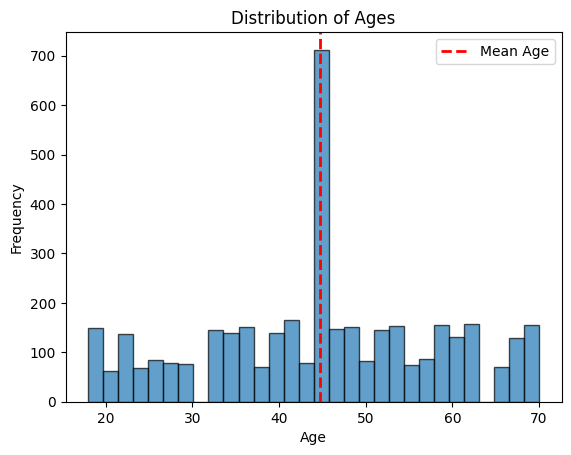

In [14]:

# Plot a histogram of the "Age" column
plt.hist(df['Age'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

# vertical line for the mean age
plt.axvline(df['Age'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Age')
plt.legend()
plt.show()


In [15]:
df['Age'].mean()

44.6874358974359

> From our nan visualization we have Age forming 16% of our dataset which is very critical. 

>From our Age we replace all NAN values with the mean  which is 44.68.  From our visualization we can tell a lot of customers are in the 44,45 age range. 

In [16]:
# convert the values in the "Review Rating" column to numeric type
df['Review Rating'] = pd.to_numeric(df['Review Rating'], errors='coerce') 

# Filling all NaN values with the mean and changing the data type to interger
df['Review Rating'] = df['Review Rating'].fillna(df['Review Rating'].mean()).astype('int64')


### Dealing with NaN in Categorical columns

> We visualize the mode of all the NaN columns. This will help us know the most frequent from each column. 

> From that insight we can make some key decisions on how to deal with our NAN values 

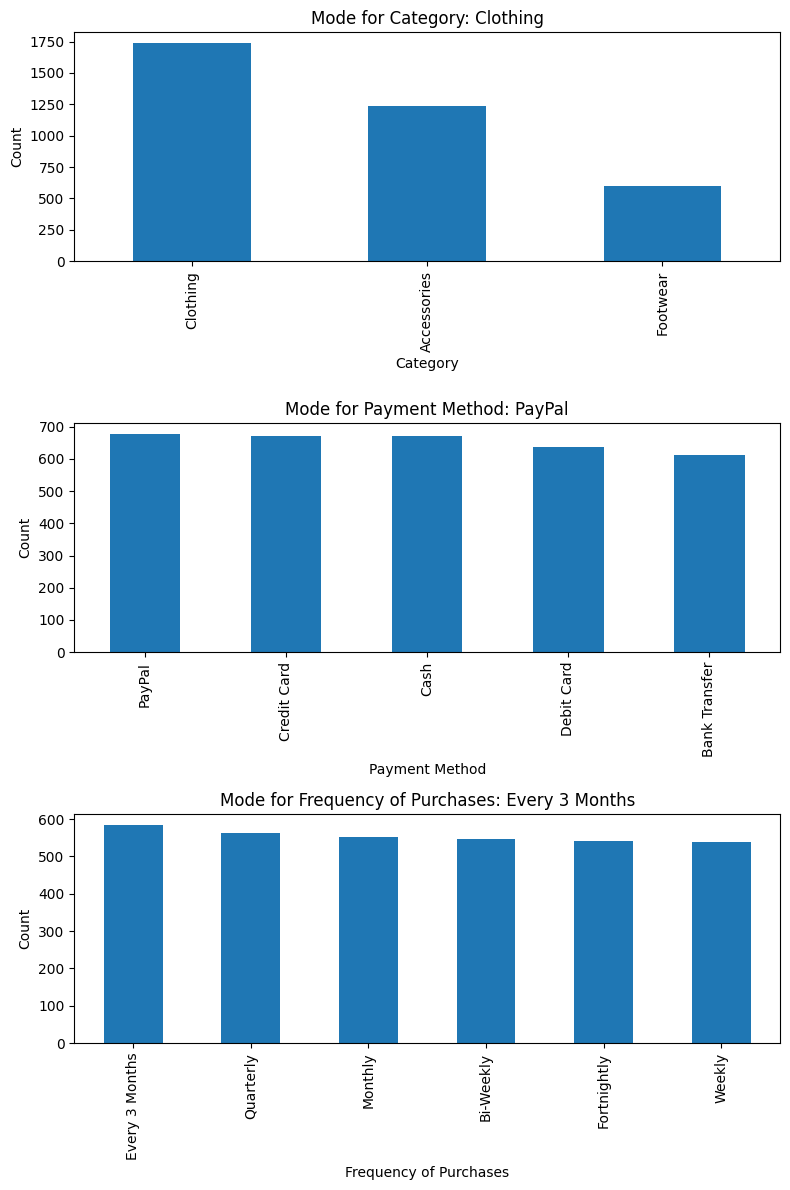

In [17]:
# columns to visualize
columns_to_visualize = ['Category', 'Payment Method', 'Frequency of Purchases']

# ubplots
fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=1, figsize=(8, 4 * len(columns_to_visualize)))

# Iterate over columns and plot bar plots for mode
for i, col in enumerate(columns_to_visualize):
    mode_value = df[col].mode().iloc[0]
    
    # Count occurrences of each value
    value_counts = df[col].value_counts()

    # Plot bar plot
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Mode for {col}: {mode_value}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
# Adjust layout
plt.tight_layout()




> From our Visualization We can see a clear picture of the most frequent from our Nan categorical column.

> We notice a higher propostion of customers purchase clothing and the mode of purchase is paypal and also the frequent of purchases is every 3 Months. 

> This mean that close to more than half of the customers purchase from every 3 months. 

> From this insight we can only replace all NaN values with the modes 

In [18]:
# Replace missing values in the "Category" column with the mode
df['Category'] = df['Category'].fillna(df['Category'].mode().iloc[0])

# Replace missing values in the "Payment Method" column with the mode
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode().iloc[0])

# Replace missing values in the "Frequency of Purchases" column with the mode
df['Frequency of Purchases'] = df['Frequency of Purchases'].fillna(df['Frequency of Purchases'].mode().iloc[0])



### Droping other NaN rows in columns 

In [19]:
columns = ['Item Purchased', 'Purchase Amount (USD)', 'Category', 'Location', 'Shipping Type','Color','Previous Purchases']
df.dropna(subset=columns, inplace=True)

We drop all NaN values in the columns ('Item Purchased', 'Purchase Amount (USD)', 'Category', 'Location', 'Previous Purchases', 'Shipping Type', 'Color') because we cannot assume the item the customer purchased and the amount it was sold for. We also cannot determine the category or the location based on this information. Therefore, we need to drop the NaNs in those rows. This action is not expected to significantly affect our predictions, considering the proportions they make up in our dataset.

In [20]:
# convert column to a float type
columns_to_convert = ['Purchase Amount (USD)', 'Review Rating']
df[columns_to_convert] = df[columns_to_convert].astype('float64')


# convert column to numeric type
df['Previous Purchases'] = pd.to_numeric(df['Previous Purchases'], errors='coerce').astype('int64')

In [21]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2403 entries, 3 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2403 non-null   int64  
 1   Age                     2403 non-null   int64  
 2   Gender                  2403 non-null   object 
 3   Item Purchased          2403 non-null   object 
 4   Category                2403 non-null   object 
 5   Purchase Amount (USD)   2403 non-null   float64
 6   Location                2403 non-null   object 
 7   Size                    2403 non-null   object 
 8   Color                   2403 non-null   object 
 9   Season                  2403 non-null   object 
 10  Review Rating           2403 non-null   float64
 11  Subscription Status     2403 non-null   object 
 12  Shipping Type           2403 non-null   object 
 13  Discount Applied        2403 non-null   object 
 14  Promo Code Used         2403 non-null   objec

### Cheers!!!!  Our Data is Clean 

### Getting statistical insignt from our data

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,2403.0,1953.895963,1125.705004,4.0,981.5,1963.0,2913.5,3900.0
Age,2403.0,44.513525,13.476941,18.0,36.0,44.0,54.0,70.0
Purchase Amount (USD),2403.0,60.655015,23.930748,21.0,40.0,62.0,81.0,100.0
Review Rating,2403.0,3.258843,0.755496,2.0,3.0,3.0,4.0,5.0
Previous Purchases,2403.0,16.743654,12.990871,0.0,5.0,13.0,28.0,50.0



Customer ID:

- Count: 2403 customers
- Mean: The average customer ID is approximately 1953.90
- Standard Deviation (std): The spread of customer IDs around the mean is about 1125.71
- Min: The smallest customer ID is 4
- 25%: The first quartile is at customer ID 981.5
- 50%: The median (second quartile) is at customer ID 1963.0
- 75%: The third quartile is at customer ID 2913.5
- Max: The largest customer ID is 3900.0


Age:

- Count: 2403 entries
- Mean: The average age is approximately 44.51 years
- Std: The standard deviation of ages is about 13.48
- Min: The youngest person in the dataset is 18 years old
- 25%: The first quartile of ages is at 36.0
- 50%: The median age is 44.0
- 75%: The third quartile is at age 54.0
- Max: The oldest person in the dataset is 70 years old


Purchase Amount (USD):

- Count: 2403 entries
- Mean: The average purchase amount is approximately $60.66
- Std: The standard deviation of purchase amounts is about $23.93
- Min: The smallest purchase amount is $21.0
- 25%: The first quartile of purchase amounts is at $40.0
- 50%: The median purchase amount is $62.0
- 75%: The third quartile is at $81.0
- Max: The largest purchase amount is $100.0

Review Rating:

- Count: 2403 entries
- Mean: The average review rating is approximately 3.26
- Std: The standard deviation of review ratings is about 0.76
- Min: The lowest review rating is 2.0
- 25%: The first quartile of review ratings is at 3.0
- 50%: The median review rating is also at 3.0
- 75%: The third quartile is at a review rating of 4.0
- Max: The highest review rating is 5.0


Previous Purchases:

- Count: 2403 entries
- Mean: The average number of previous purchases is approximately 16.74
- Std: The standard deviation of previous purchases is about 12.99
- Min: The minimum number of previous purchases is 0 # Meaning its a first time customer 
- 25%: The first quartile of previous purchases is at 5.0
- 50%: The median number of previous purchases is 13.0
- 75%: The third quartile is at 28.0
- Max: The maximum number of previous purchases is 50.0

### Creating the Age Group 

In [41]:
# Age ranges for each group
bins = [0, 30, 60, float('inf')]
labels = ['Young', 'Middle-aged', 'Senior']

# "Age Group" column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
3,4,44,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.0,Yes,Next Day Air,Yes,Yes,9,PayPal,Weekly,Middle-aged
4,5,44,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.0,Yes,Free Shipping,Yes,Yes,31,PayPal,Every 3 Months,Middle-aged
8,9,44,Male,Coat,Clothing,97.0,West Virginia,L,Silver,Summer,2.0,Yes,Express,Yes,Yes,8,PayPal,Every 3 Months,Middle-aged
11,12,44,Male,Shorts,Clothing,68.0,Hawaii,S,Olive,Winter,4.0,Yes,Store Pickup,Yes,Yes,10,Bank Transfer,Fortnightly,Middle-aged
12,13,61,Male,Coat,Clothing,72.0,Delaware,M,Gold,Winter,4.0,Yes,Express,Yes,Yes,37,PayPal,Fortnightly,Senior


### Exploratory Data Analysis

> 1. Univariate Analysis
> 2. Bivariate Analysis
> 3. Multivariate Analysis


#### Univariate Analysis
Lets Visualize each column separating. We can us a library called Datasist to save us sometime. 
This line of code will analysis each column automatically 

Unique Values in Location is too large to plot




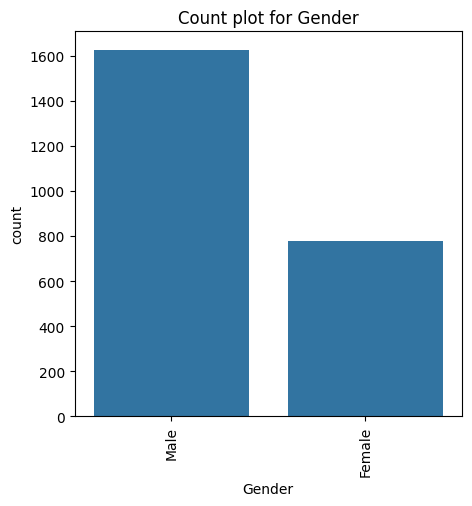

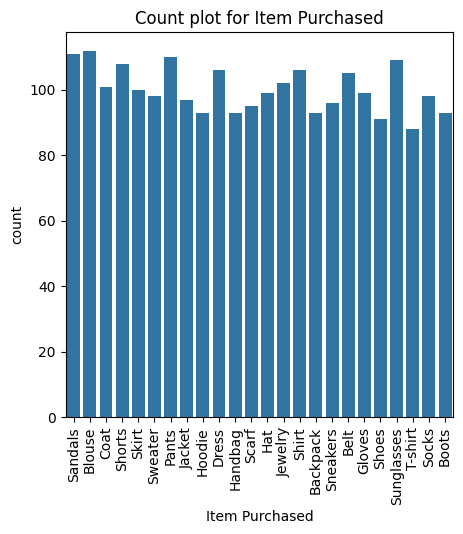

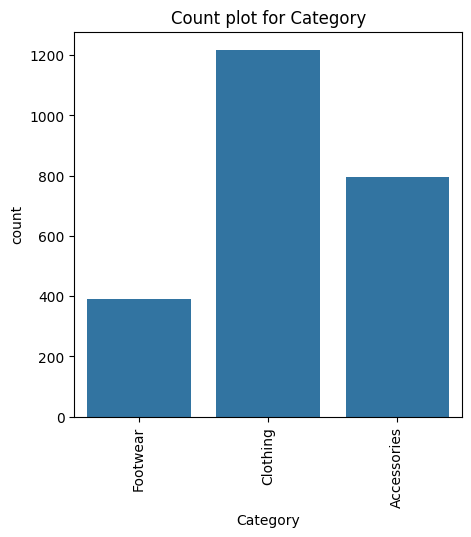

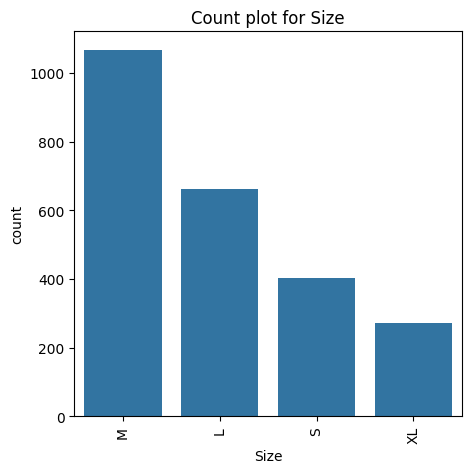

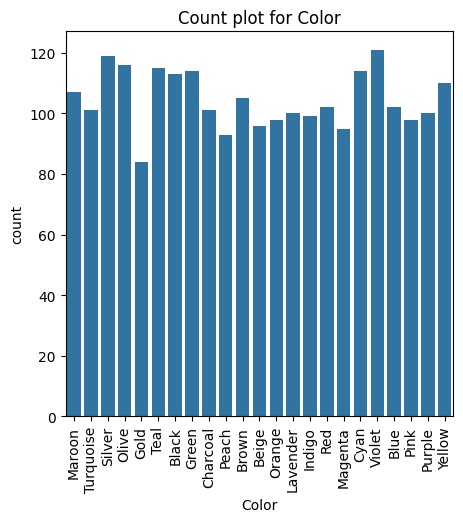

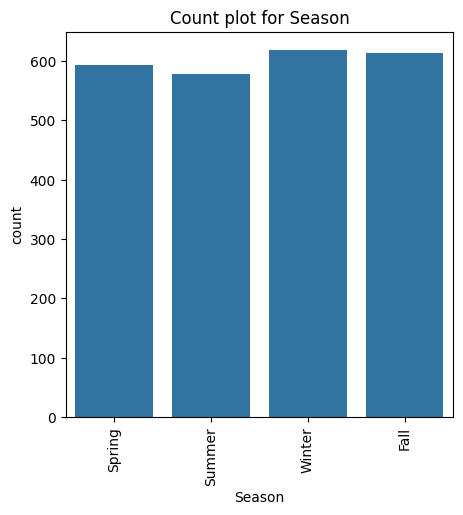

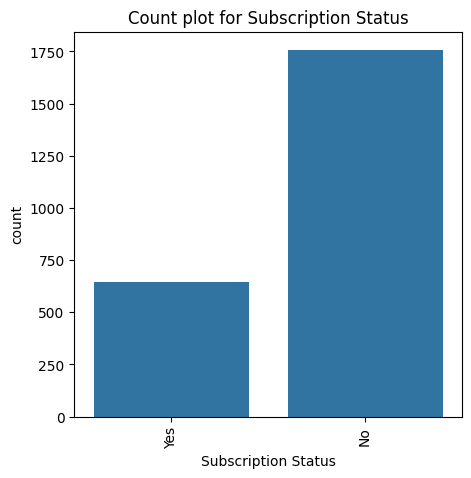

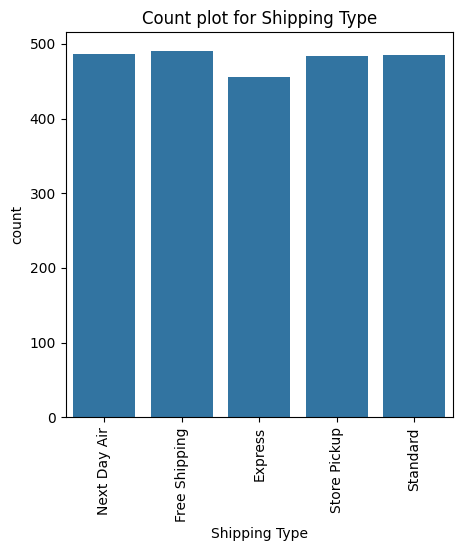

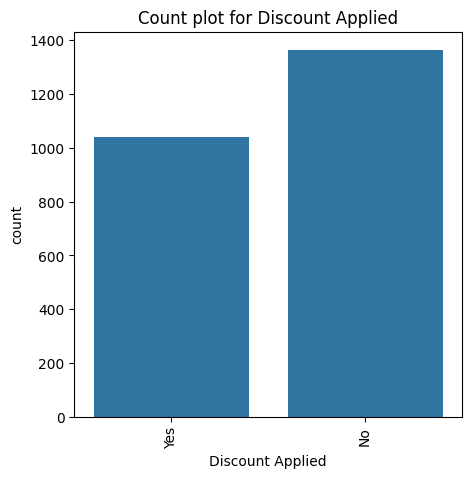

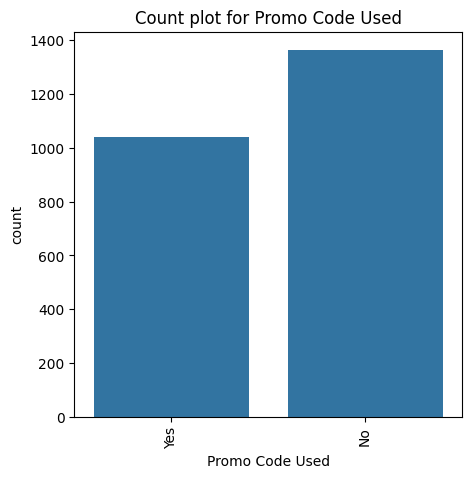

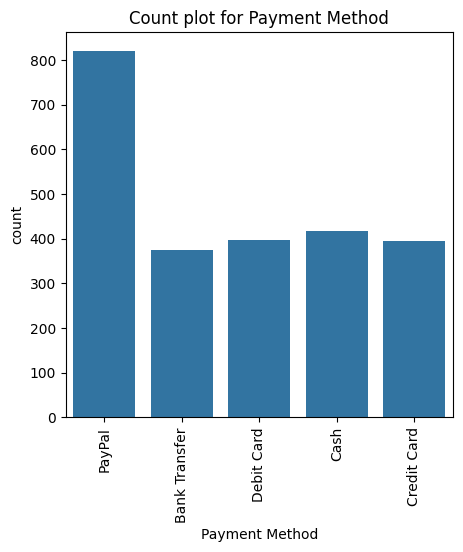

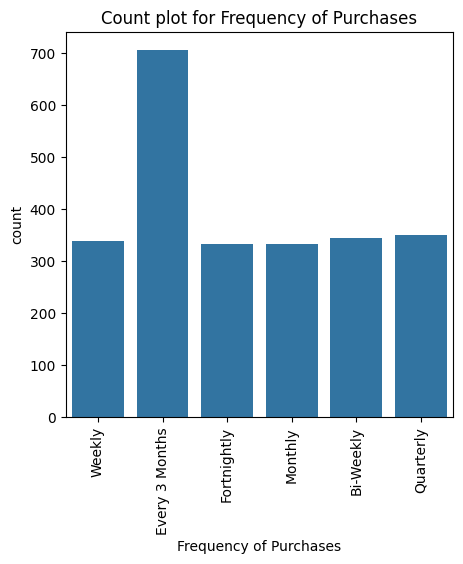

In [24]:
import datasist as ds 

# Visualizing Categorical coulmns 

ds.visualizations.countplot(df)

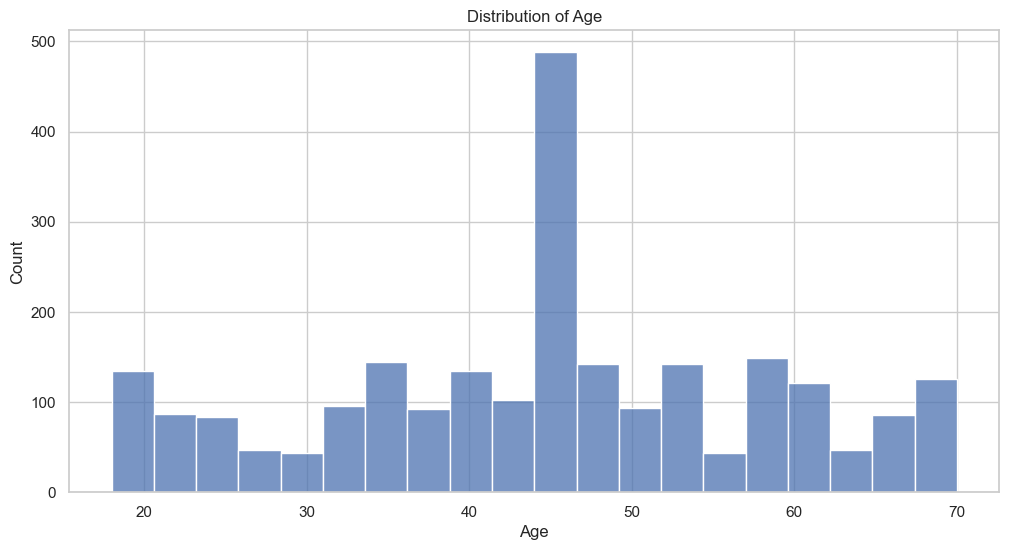

In [45]:
 # visualizing the distribution of the age
 
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', multiple="stack", bins=20, palette="pastel")
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


##### Bivirant Analysis 

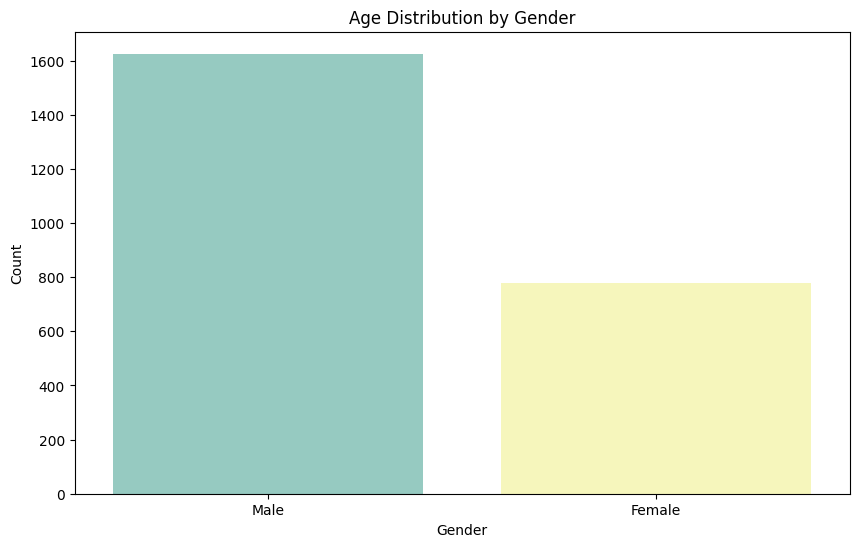

In [26]:

plt.figure(figsize=(10, 6))

# Bivariate count plot
sns.countplot(x='Gender', data=df, palette="Set3")

plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()


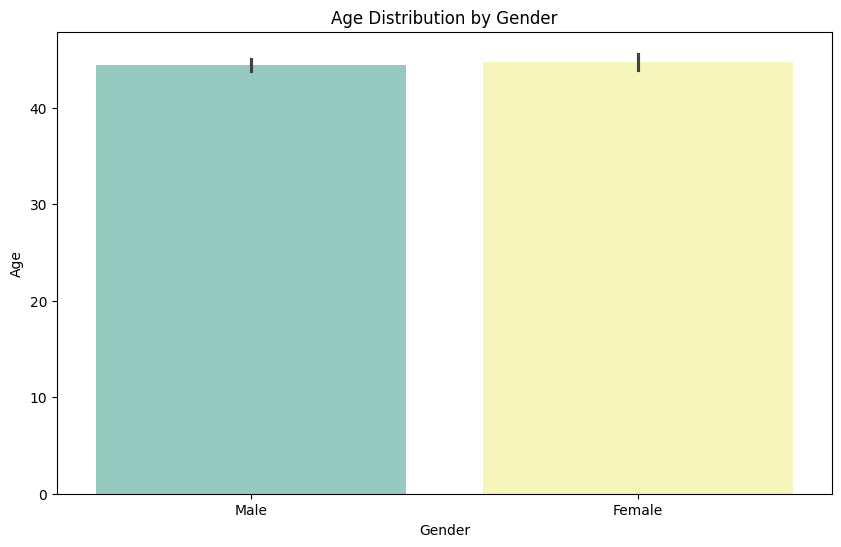

In [27]:


plt.figure(figsize=(10, 6))

# Bivariate bar plot
sns.barplot(x='Gender', y='Age', data=df, palette="Set3") 

plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')


plt.show()


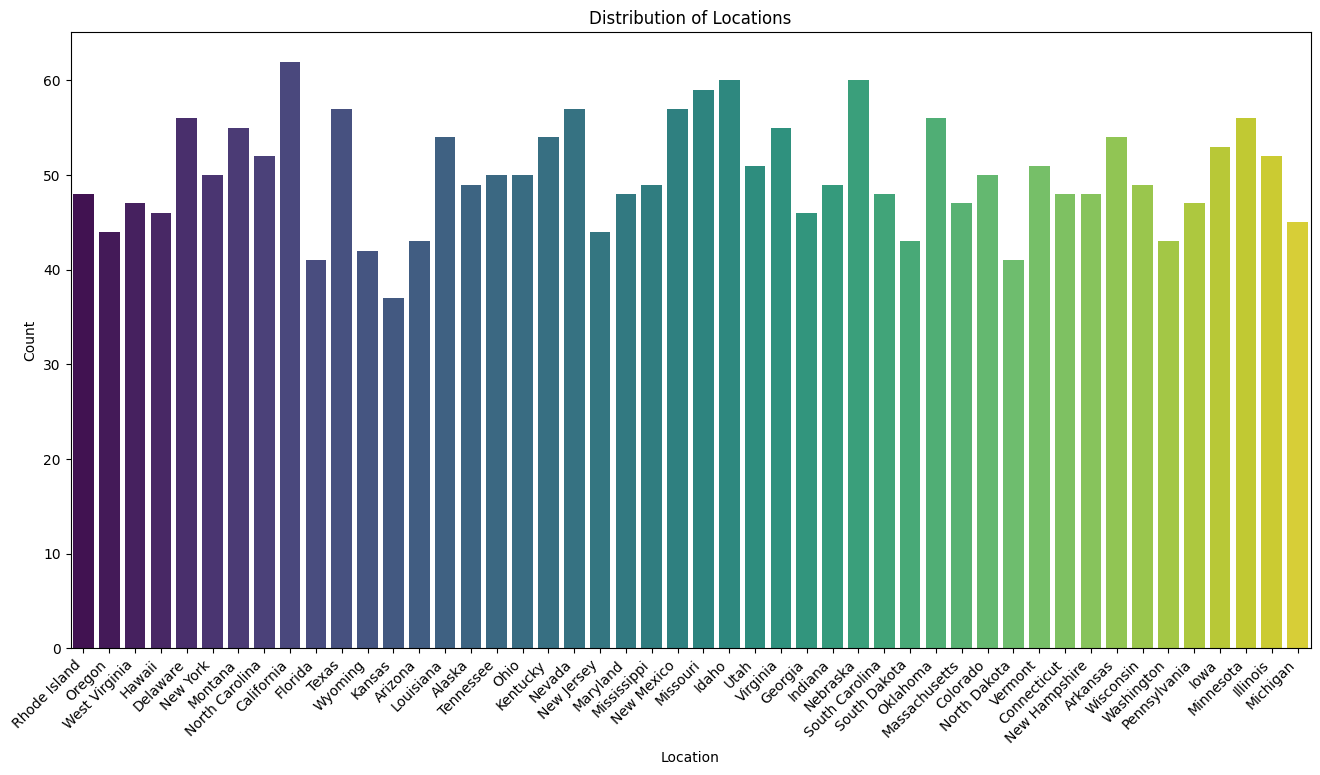

In [39]:
plt.figure(figsize=(16, 8)) 

# Countplot for the 'Location' column
sns.countplot(x='Location', data=df, palette="viridis")

plt.title('Distribution of Locations')
plt.xlabel('Location')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [29]:
top_purchases = df['Item Purchased'].value_counts().head(10)
top_purchases

Item Purchased
Blouse        112
Sandals       111
Pants         110
Sunglasses    109
Shorts        108
Dress         106
Shirt         106
Belt          105
Jewelry       102
Coat          101
Name: count, dtype: int64

In [30]:

top_ratings = df.nlargest(20, 'Review Rating')[['Item Purchased', 'Review Rating']]
print(top_ratings)


     Item Purchased  Review Rating
111            Belt            5.0
374         Jewelry            5.0
556            Coat            5.0
965           Boots            5.0
1251         Shorts            5.0
1277         Blouse            5.0
1376        Sandals            5.0
1486       Sneakers            5.0
1496        T-shirt            5.0
1618        Sandals            5.0
1664        Handbag            5.0
1820          Shirt            5.0
1882          Scarf            5.0
1902        Sandals            5.0
1993         Blouse            5.0
2193          Shirt            5.0
2256         Blouse            5.0
2294     Sunglasses            5.0
2434         Gloves            5.0
2469        Sandals            5.0


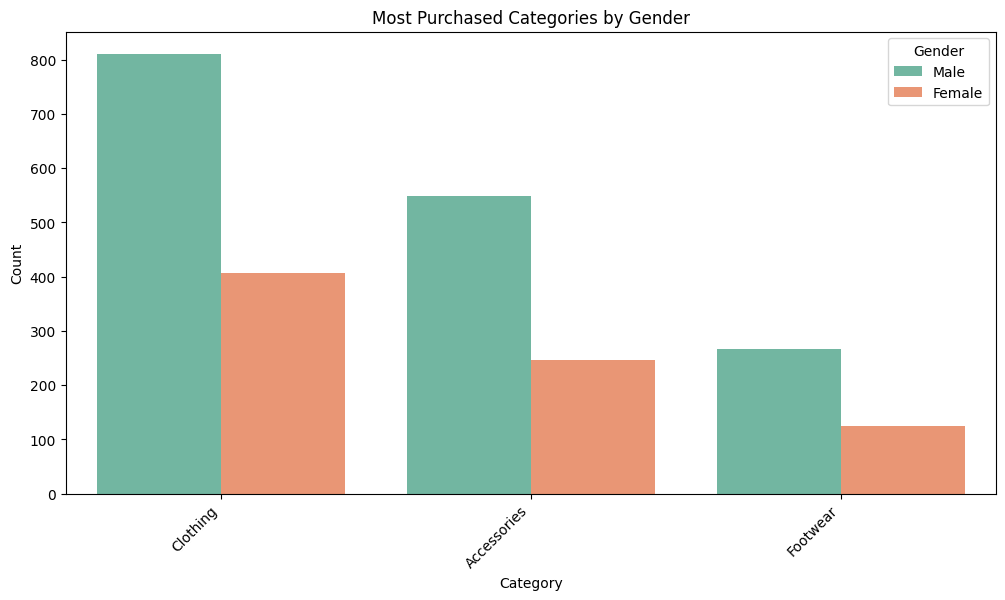

In [31]:

plt.figure(figsize=(12, 6))

# Bar plot for the most purchased categories by gender
sns.countplot(x='Category', hue='Gender', data=df, palette='Set2', order=df['Category'].value_counts().index)

plt.title('Most Purchased Categories by Gender')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.legend(title='Gender', loc='upper right')
plt.show()


### Encoding Categorical Columns

> Labeling Encoding 

In [32]:
# Creating a copy of our datase
df_encoded = df.copy()

In [47]:

df_categorical = df_encoded.select_dtypes(include=['object'])

label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns
for column in df_categorical.columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

df_encoded


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3,4,44,1,13,2,90.0,36,1,11,1,3.0,1,2,1,1,9,4,5
4,5,44,1,2,1,49.0,34,1,20,1,2.0,1,1,1,1,31,4,1
8,9,44,1,4,1,97.0,45,0,18,2,2.0,1,0,1,1,8,4,1
11,12,44,1,17,1,68.0,9,2,12,3,4.0,1,4,1,1,10,0,2
12,13,61,1,4,1,72.0,6,1,6,3,4.0,1,0,1,1,37,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,3892,36,0,5,1,30.0,4,0,14,3,4.0,0,1,0,0,6,0,4
3892,3893,35,0,11,0,86.0,19,0,8,2,3.0,0,3,0,0,5,4,2
3897,3898,46,0,1,0,33.0,27,0,7,1,2.0,0,3,0,0,2,4,4
3898,3899,44,0,16,2,77.0,20,2,3,2,3.0,0,0,0,0,2,4,5


In [34]:

df_hot_encoder = df.copy()

# One-hot encode categorical columns
df_hot_encoder = pd.get_dummies(df_hot_encoder, columns=df_hot_encoder.select_dtypes(include=['object']).columns).astype(int)


df_hot_encoder


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,...,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
3,4,44,90,3,9,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,5,44,49,2,31,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
8,9,44,97,2,8,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
11,12,44,68,4,10,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,13,61,72,4,37,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,3892,36,30,4,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3892,3893,35,86,3,5,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3897,3898,46,33,2,2,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3898,3899,44,77,3,2,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### Insight from our EDA 

> Male Dominance in Purchases: The majority of purchases are made by males, indicating a notable market presence. This
insight suggests a potential focus on catering to male customers and expanding the male collection.

> Popular Male Items: Despite the general trend, certain items such as Blouses, Sandals, Pants, Sunglasses, Shorts, Dresses, Shirts, Belts, Jewelry, and Coats are popular among male buyers. This information is crucial for tailoring the product offerings to meet the specific preferences of male customers.

> Highly Rated Male Items: Examining items with a 5.0 rating reveals a significant list of highly-rated male products. This indicates a positive response from male customers and provides insights into the types of items that resonate well with them.

> Geographical Spread: Customers are spread across the US, with additional presence in Canada and Hawaii. This geographical diversity suggests that location is not a limiting factor, providing opportunities for broader market expansion and targeting customers in different regions.